# Data Log

- Keep track of where you made and calculated variables


In [2]:
# Import Packages

#Data Structure/Organization Packages
import pandas as pd
import xarray as xr
import numpy as np
import numpy.ma as ma

# Plotting Packages
import matplotlib.pyplot as plt
from cmocean import cm as cmo
import seaborn as sns
import matplotlib.patches as patch
from labellines import labelLine, labelLines
from matplotlib.ticker import FormatStrFormatter
import matplotlib.patheffects as pe 

# Utility Packages
import random as rand
import os
import math
# import dataframe_image as dfi
import itertools
from scipy import interpolate
from tqdm import tqdm

# Oceanography Packages
import gsw
import importlib
import geopy.distance

# Import Packages

#Data Structure/Organization Packages
import pandas as pd
import xarray as xr
import numpy as np
import numpy.ma as ma


In [3]:
# Modules
import mod_main as sg
import mod_L3proc as gproc     # for L3 grid processing
import mod_DFproc as dfproc    # for dataframe processing
import mod_plot as sgplot  
import mod_RFR as rfr
import mod_MLV as mlv

from mod_plot import my_params
from importlib import reload

plt.rcParams.update(my_params(16))

# Get data
from mod_main import df_659, df_660, dav_659, dav_660
from mod_main import sgfloat, dav_6030, dav_float
# from mod_RFR import RF_validation, RF_test, RF_modelmetrics, RF_featimps
# from mod_RFR import RF_kfold, RF_loo

from mod_MLV import mlstat_659, mlstat_660, mlstat_float
from mod_MLV import hvariance_659, hvariance_660
from mod_main import floatDF
wmoids = floatDF.wmoid.unique()


In [ ]:
# ## making some dav's
# for ind, profnum in enumerate(mlstat_660.profid.values):
#     if profnum in baseML_stat660.profid.values:
#         mlstat_660.at[ind, 'log_buoyancy'] = baseML_stat660[baseML_stat660.profid==profnum].log_buoyancy.values[0]
#         # mlstat_660.at[ind, 'grad_nitrate'] = baseML_stat660[baseML_stat660.profid==profnum].grad_nitrate.values[0]
#     if profnum in bx100_660.profid.values:
#         mlstat_660.at[ind, 'Bx'] = bx100_660[bx100_660.profid==profnum].Bx.values[0]

# for ind, profnum in enumerate(mlstat_659.profid.values):
#     if profnum in baseML_stat659.profid.values:
#         mlstat_659.at[ind, 'log_buoyancy'] = baseML_stat659[baseML_stat659.profid==profnum].log_buoyancy.values[0]
#         # mlstat_659.at[ind, 'grad_nitrate'] = baseML_stat659[baseML_stat659.profid==profnum].grad_nitrate.values[0]
#     if profnum in bx100_659.profid.values:
#         mlstat_659.at[ind, 'Bx'] = bx100_659[bx100_659.profid==profnum].Bx.values[0]
        
# dir = '../working-vars/ML-variability/'
# mlstat_659.to_csv(dir + 'mixedlayerstat_659_may24.csv')
# mlstat_660.to_csv(dir + 'mixedlayerstat_660_may24.csv')

# mldf_659.to_csv(dir + 'mldf_659_may24.csv')
# mldf_660.to_csv(dir + 'mldf_660_may24.csv')
# dav_6030 =pd.read_csv('../data/bgc-argo/dav_full6030_noqc.csv')   

# modis = xr.open_dataset('../data/satellite/Aqua.L3m_8D_2019_par_4km.nc')
# modis['days'] = sg.datetime2ytd(modis.time)

# def get_closest_par(row):
#     lat = row.lat
#     lon = row.lon
#     time = sg.ytd2datetime(row.yearday)

#     row['par'] = modis.sel(time=time, lat=lat, lon=lon, method='nearest').par.values
#     return row

# # Trim MODIS to speed up method
# lat1 = -57
# lat2 = -48
# lon1 = 10
# lon2 = 70

# modis = modis.sel(lat=slice(lat1, lat2))
# modis = modis.sel(lon=slice(lon1, lon2))
# modis = modis.sel(time=slice('2019-04-15', '2019-08-05'))

# dav_6030['par'] = np.tile(np.nan, dav_6030.shape[0])
# dav_6030 = dav_6030.apply(get_closest_par, axis='columns')
# dav_6030.profid = dav_6030.profid.astype(int)

# dav_6030

# pd.read_csv('../data/bgc-argo/dav_sgfloat_EKE.csv')  
# dav_float[['profid', 'yearday', 'lat', 'lon', 'mld', 'eke', 'par']].to_csv('../data/bgc-argo/dav_sgfloat_EKEPAR.csv')
# pd.read_csv('../data/glider/dav_659_EKE.csv')  

# dav_659 = pd.read_csv('../data/glider/dav_659_EKE.csv')  
# dav_660 = pd.read_csv('../data/glider/dav_660_EKE.csv')
# # Add PAR
# def get_closest_par(row):
#     lat = row.lat
#     lon = row.lon
#     time = sg.ytd2datetime(row.yearday)

#     row['par'] = modis.sel(time=time, lat=lat, lon=lon, method='nearest').par.values
#     return row

# dav_660['par'] = np.tile(np.nan, dav_660.shape[0])
# dav_659['par'] = np.tile(np.nan, dav_659.shape[0])


# dav_659 = dav_659.apply(get_closest_par, axis='columns')
# dav_660 = dav_660.apply(get_closest_par, axis='columns')

# dav_660.profid = dav_660.profid.astype(int)  # apply function will cast into float
# dav_659.profid = dav_659.profid.astype(int)
# dav_659.to_csv('../data/glider/dav_659_EKEPAR.csv')  
# dav_660.to_csv('../data/glider/dav_660_EKEPAR.csv')
# dav_float
# from mod_plot import *
# fig = plt.figure(figsize=(10,6))
# ax = fig.gca()
# ax.scatter(mlstat_659.yearday, mlstat_659.mld, s=10, alpha=0.8, label='SG659', color=plat_colors['sg659'], zorder=3)
# ax.scatter(mlstat_660.yearday, mlstat_660.mld, s=10, alpha=0.8, label='SG660',color=plat_colors['sg660'], zorder=3)
# ax.scatter(dav_6030.yearday, dav_6030.mld, label='Float',  marker='D', edgecolors='k', linewidth=2.1,
#                 s=10, alpha=0.8, color='#CCBB44', zorder=3)

# ax.legend(markerscale=3, ncol=3)
# # reload(sg)
# reload(sgplot)
# fsize = (7,11)
# # fsize = 13,26
# sgplot.plt_time_series(fsize = fsize, dotsize=8, diasize=50, titlesize=16, dateformat=True,
#                        legend=False)
# from mod_plot import plat_colors
# reload(sgplot)
# from mod_plot import *

In [ ]:
# reload(dfproc)
# bx100_660 = dfproc.get_depth_bx(df_660, d0=100, thresh=5)
# bx100_659 = dfproc.get_depth_bx(df_659, d0=100, thresh=5)
# mldf_659 = dfproc.make_mldf(df_659, dav_659)
# mldf_660 = dfproc.make_mldf(df_660, dav_660)
# mldf_float = dfproc.make_mldf(sgfloat, dav_float)
# baseML_stat659 = mlv.get_baseML_stat(mldf_659, dav_659)
# baseML_stat660 = mlv.get_baseML_stat(mldf_660, dav_660)
# baseML_float = mlv.get_baseML_stat(mldf_float, dav_float)

# Float selection 

In [ ]:
# Restrict the data to Antarctic Southern Zone (ASZ) region
argo_qc = dfproc.between_fronts(floatDF, PF, SIF, buffers=[0.5,0.5])
ship_qc = dfproc.between_fronts(shipDF, PF, SIF, buffers=[0.5,0.5])

# Restrict by time
start_yd = sg.datetime2ytd(np.datetime64('2017-04-20')) # datetime(2019,4,30)  # yd 120
end_yd = sg.datetime2ytd(np.datetime64('2021-07-30')) # datetime(2019,7,19)  # yd 200

# Remove some points that appear to roam outsize the ASZ
lat1 = -65; lat2 = -45
lon1 = 5; lon2 = 65
argo_qc = dfproc.restrict_DF(argo_qc, start_yd, end_yd, lat1, lat2, lon1, lon2)
ship_qc = dfproc.restrict_DF(ship_qc, start_yd, end_yd, lat1, lat2, lon1, lon2)

dfproc.print_bounds(argo_qc)
wmoids = argo_qc.wmoid.unique()
print('Number of floats within bounds: ' + str(len(argo_qc.wmoid.unique())))
argo_qc.value_counts('wmoid')

NameError: name 'PF' is not defined

In [ ]:
# Remove any floats that have fewer than 100 obs
newdf = pd.DataFrame()
for wmo in wmoids: 
    flo = argo_qc[argo_qc.wmoid==wmo]
    if len(flo)>100:
        newdf = pd.concat([newdf, flo])
    else:
        print('wmo ' + str(wmo) + ' removed.')
argo_qc = newdf.copy()

wmoids = argo_qc.wmoid.unique()
print('Number of floats within bounds: ' + str(len(argo_qc.wmoid.unique())))
# argo_qc.value_counts('wmoid')
print(argo_qc.wmoid.unique())

Number of floats within bounds: 7
[5904469 5904659 5905368 5905996 5906030 5906031 5906207]


/opt/homebrew/Caskroom/mambaforge/base/envs/mlsogos/lib/python3.8/site-packages/labellines/core.py:204: UserWarning: The value at position 0 in `xvals` is outside the range of its associated line (xmin=28.246, xmax=33.568, xval=27.35). Clipping it into the allowed range.
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/envs/mlsogos/lib/python3.8/site-packages/labellines/core.py:204: UserWarning: The value at position 5 in `xvals` is outside the range of its associated line (xmin=56.495, xmax=64.896, xval=50.3). Clipping it into the allowed range.
  warnings.warn(


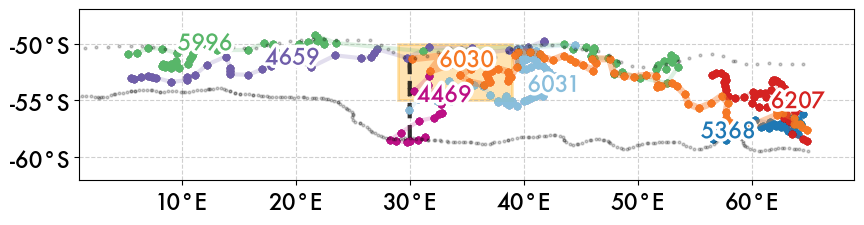

In [ ]:
# Single plot for argo map
fig = plt.figure(figsize=(10,8))
ax=plt.gca()

for wmo in wmoids[wmoids!=5906030]:
    ax.plot(floatDF[floatDF.wmoid==wmo].lon,floatDF[floatDF.wmoid==wmo].lat,
            color = wmo_colors[wmo], alpha=0.2, linewidth=3, label=str(wmo)[3:], zorder=3)
    ax.scatter(floatDF[floatDF.wmoid==wmo].lon,floatDF[floatDF.wmoid==wmo].lat,
            color = wmo_colors[wmo], alpha=0.1, s=20, zorder=3)

for wmo in [5906030]:
    ax.plot(floatDF[floatDF.wmoid==wmo].lon,floatDF[floatDF.wmoid==wmo].lat,
            color = sns.color_palette("Oranges")[3], alpha=0.4, linewidth=5, label=str(wmo)[3:], zorder=3)
    ax.scatter(floatDF[floatDF.wmoid==wmo].lon,floatDF[floatDF.wmoid==wmo].lat,
            color = sns.color_palette("Oranges")[3], alpha=0.1, s=20, zorder=3)

for front in [SIF, PF]:
     front = front[(front.lon > 0 ) & (front.lon <65)]
     ax.scatter(front.lon, front.lat, color='k', alpha=0.2, s=4, zorder=3)
#      ax.plot(front.lon, front.lat, color='k', alpha=0.1, linewidth=2, zorder=3)

# plt.title('BGC-Argo Training Data')
# plt.title('Argo Yeardays: ' + str(start_yd) + ' to ' + str(end_yd))
rect = patch.Rectangle((29,-55),10,5, fill=True, color="orange", alpha=0.3,linewidth=2, zorder=1)

ax.add_patch(rect)
ax.set_xlim(1,69)
ax.set_ylim(-62,-47)
ax.set_aspect('equal')

ax.yaxis.set_major_formatter("{x:1.0f}°S")
ax.xaxis.set_major_formatter("{x:1.0f}°E")

ax.grid(linestyle='dashed', alpha=0.6, zorder=1)

lines = ax.get_lines()
labelLines(lines, align=False, fontsize=16, zorder=3)
# labelLines(lins) # , align=False, fontsize=18)
ax.plot(shipDF.lon, shipDF.lat, alpha=0.8, linestyle='dashed', c='k', linewidth=3)

# if save:
#         plt.savefig('../figures/Argo_simple_region_map.png', dpi=300)

In [ ]:
# shipDF.to_csv('../data/go-ship/mldata_shipDF_qc.csv', index=False)
# argo_qc.to_csv('../data/bgc-argo/mldata_floatDF_qc.csv', index=False)

In [ ]:

# daylist = np.arange(120,201,1)
# # daylist = np.arange(140,143,1)
# for day in daylist:
#     fig = plt.figure(figsize=(14,8))
#     adt_sogos.adt.attrs={'long_name':'ADT'}
#     dat = adt_sogos.sel(time=sg.ytd2datetime(day))
#     map = dat.adt.plot(cmap=cmo.ice_r, vmin=-1.2, vmax=-.15, zorder=1)

#     # ticklist = np.arange(-1.2, -.2, .02)
#     # cax = fig.add_axes([ax.get_position().x1+0.04,ax.get_position().y0,0.03,ax.get_position().height])
#     # cbar = plt.colorbar(map, ax=cax, ticks=ticklist)
#     # cbar.set_label('ADT (m)')

#     plt.title('Yearday ' + str(day))
#     # plt.title('')

#     # Plot glider paths
#     plt.plot(diveave_659.lon, diveave_659.lat, linewidth=9, color=hue659, alpha=0.7)
#     plt.plot(diveave_660.lon, diveave_660.lat, linewidth=12, color=hue660, alpha=0.5)

#     ax=fig.gca()
#     ax.set_ylim([-55.7, -47.7])
#     ax.set_xlim([29.1, 39.1])
#     # ax.set_aspect('equal')
#     ax.yaxis.set_major_formatter("{x:1.0f}°S")
#     ax.xaxis.set_major_formatter("{x:1.0f}°E")

#     # Plot points of glider on that day
#     i = np.where(diveave_659.days.round()==day)
#     plt.scatter(diveave_659.lon.iloc[i], diveave_659.lat.iloc[i], 400, color=hue659, label = '659', zorder=3, alpha=1, edgecolors='k') # marker='o', markeredgecolor='k')
#     i = np.where(diveave_660.days.round()==day)
#     plt.scatter(diveave_660.lon.iloc[i], diveave_660.lat.iloc[i], 400, color=hue660, label = '660', zorder=3, alpha=1, edgecolors='k')


#     # Plot nearest argo float location
#     dayfloat = sgfloat[sgfloat.yearday==(day // 5) * 5]  # use floor function to round day to nearest 5 day, to match argo
#     plt.scatter(dayfloat.lon, dayfloat.lat, s=800, color='yellow', alpha=1, marker='D', edgecolors='k', label='argo', zorder=3)

#     plt.ylabel('')
#     plt.xlabel('')
#     # plt.legend(facecolor='white', labelcolor='white', framealpha=0.2)


#     plt.tight_layout()
#     if savefig:
#         plt.savefig(file_path + fname + str(day) + '.png', format='png')
#         # print('saved')
#         plt.close()

### 1.1.1 Checking Training Data Distributions

- We do quick screening to make sure the training data are representative. 

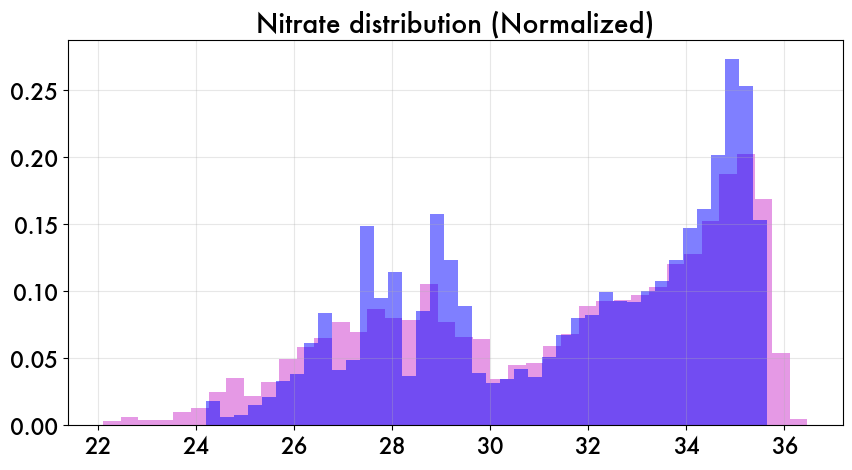

In [ ]:
# Compare distributions between float and gliders
threshold = 1000
dfloat = floatDF[floatDF.pressure<threshold]

fig = plt.figure(figsize=(10,5))
plt.hist(dfloat.nitrate, bins=40, color='m', alpha=0.4, label="float", density=True)
plt.hist(dfloat[dfloat.wmoid == 5906030].nitrate, bins=40, color='b', alpha=0.5, label="float 6030", density=True)
plt.title('Nitrate distribution (Normalized)')
plt.grid(alpha=0.3, zorder=1)


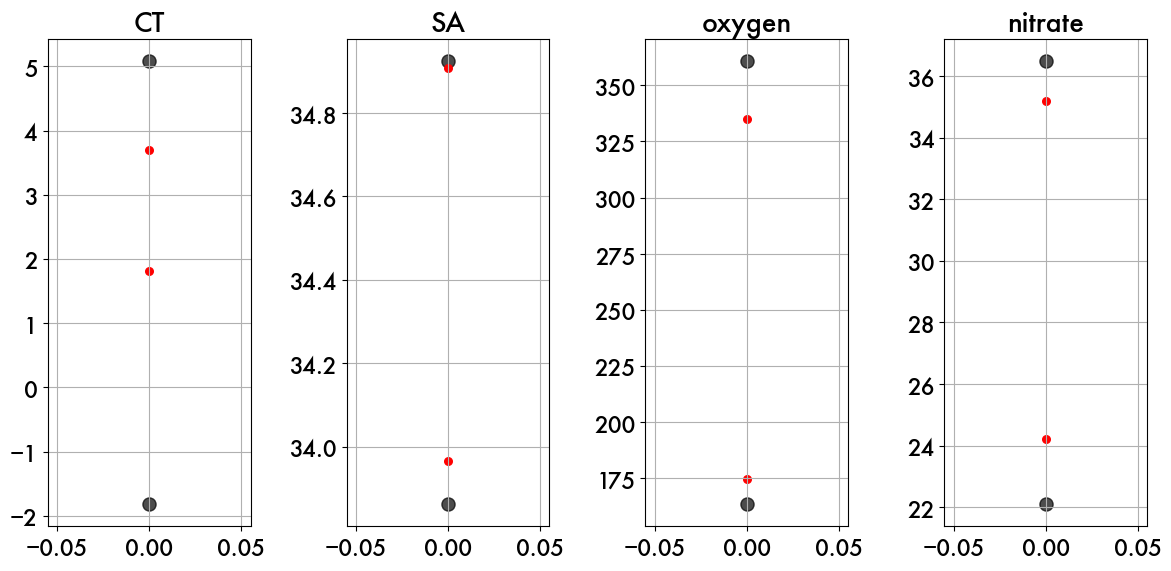

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(12,6), layout='tight')   
axs = axs.flatten()

others = floatDF[floatDF.wmoid!=5906030]
for i, var in enumerate(['CT' , 'SA', 'oxygen', 'nitrate']):
    minval = others[var].min()
    maxval = others[var].max()
    axs[i].scatter([0,0], [minval, maxval], c='k', alpha=0.7, s=90, label='others')
    axs[i].scatter([0,0], [sgfloat[var].min(), sgfloat[var].max()], c='r', s=30, label='sogos')
    # axs[i].scatter([0,0], [df_659[var].min(), df_659[var].max()], c='c', s=30, label='sg660')
    axs[i].set_title(var)
    axs[i].grid()


# After choosing, QC

In [ ]:
# Add last variables and set up final training data

# Add seasonal variable
def add_yd_sinusoids(DF):
    DF['ydcos'] = [sg.get_ydsines(x)[0] for x in DF.yearday.values]
    DF['ydsin'] = [sg.get_ydsines(x)[1] for x in DF.yearday.values]
    return DF

floatDF = add_yd_sinusoids(floatDF)
shipDF = add_yd_sinusoids(shipDF)

# Altimetry

Global Ocean Gridded L 4 Sea Surface Heights And Derived Variables Reprocessed 1993 Ongoing:

- https://data.marine.copernicus.eu/product/SEALEVEL_GLO_PHY_L4_MY_008_047/download

- https://doi.org/10.48670/moi-00148


In [4]:
# Use correct delayed-time product
altimetry = xr.open_dataset('../data/satellite/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D_1714604183615.nc')
altimetry['eke'] = np.sqrt(altimetry.ugosa**2 + altimetry.vgosa**2) /2 
datestart='2019-04-30'
dateend='2019-07-25'
dateend='2021-07-25'
lat1=-56.8; lat2=-43
lon1=19; lon2=41
data_sat = altimetry.sel(time=slice(datestart, dateend))
data_sat = data_sat.sel(latitude=slice(lat1, lat2))
data_sat = data_sat.sel(longitude=slice(lon1, lon2))
avg_altimetry = data_sat.mean(dim='time')

dav_659['eke'] = dfproc.get_track_eke(dav_659, data_sat, daily=True)
dav_660['eke']= dfproc.get_track_eke(dav_660, data_sat, daily=True)
dav_float['eke'] = dfproc.get_track_eke(dav_float, data_sat, daily=True)
dav_659['eke_avg'] = dfproc.get_track_eke(dav_659, data_sat, daily=False)
dav_660['eke_avg']= dfproc.get_track_eke(dav_660, data_sat, daily=False)
dav_float['eke_avg'] = dfproc.get_track_eke(dav_float, data_sat, daily=False)

In [ ]:
# Use correct delayed-time product
# Use AVISO satellite data to see study bounds. 
from mod_main import altimetry

# Download fronts of the Antarctic Circumpolar Current
PF = pd.read_csv('../data/ACC_fronts/PF.csv', header=None)
SIF = pd.read_csv('../data/ACC_fronts/SIF.csv', header=None)
for csv in [PF, SIF]:
    csv.columns = ['lon', 'lat']

# EKE CALCULATION

In [ ]:
datestart='2019-04-30'
dateend='2019-07-25'
dateend='2021-07-25'
lat1=-56.8; lat2=-43
lon1=19; lon2=41
data_sat = altimetry.sel(time=slice(datestart, dateend))
data_sat = data_sat.sel(latitude=slice(lat1, lat2))
data_sat = data_sat.sel(longitude=slice(lon1, lon2))
avg_aviso = data_sat.mean(dim='time')

dav_659['eke'] = dfproc.get_track_eke(dav_659, data_sat, daily=True)
dav_660['eke']= dfproc.get_track_eke(dav_660, data_sat, daily=True)
dav_659['eke_avg'] = dfproc.get_track_eke(dav_659, data_sat, daily=False)
dav_660['eke_avg']= dfproc.get_track_eke(dav_660, data_sat, daily=False)




In [ ]:
# daily
# ==
fig = plt.figure(figsize=(8,4), layout='constrained')
ax = plt.gca()
ax.plot(dav_659.yearday, dav_659.eke, color=plat_colors['sg659'], label='sg659')
ax.plot(dav_660.yearday, dav_660.eke, color=plat_colors['sg660'], label='sg660')

# averaged
fig = plt.figure(figsize=(8,4), layout='constrained')
ax = plt.gca()
ax.plot(dav_659.yearday, dav_659.eke_avg, color=plat_colors['sg659'], label='sg659')
ax.plot(dav_660.yearday, dav_660.eke_avg, color=plat_colors['sg660'], label='sg660')

# PAR

In [3]:
# import pyproj
# # need to find MODIS tile number to download

# CELLS = 2400
# VERTICAL_TILES = 18
# HORIZONTAL_TILES = 36
# EARTH_RADIUS = 6371007.181
# EARTH_WIDTH = 2 * math.pi * EARTH_RADIUS

# TILE_WIDTH = EARTH_WIDTH / HORIZONTAL_TILES
# TILE_HEIGHT = TILE_WIDTH
# CELL_SIZE = TILE_WIDTH / CELLS

# MODIS_GRID = pyproj.Proj(f'+proj=sinu +R={EARTH_RADIUS} +nadgrids=@null +wktext')

# def lat_lon_to_modis(lat, lon):
#     x, y = MODIS_GRID(lon, lat)
#     h = (EARTH_WIDTH * .5 + x) / TILE_WIDTH
#     v = -(EARTH_WIDTH * .25 + y - (VERTICAL_TILES - 0) * TILE_HEIGHT) / TILE_HEIGHT
#     return int(h), int(v)

# lat1=-54.7; lat2=-49.2
# lon1=29.5; lon2=39.4

# [htile1, vtile1] = lat_lon_to_modis(lat1, lon1)
# [htile2, vtile2] = lat_lon_to_modis(lat2, lon2)



# FLOAT MLD

In [ ]:
lat1=-54.7; lat2=-49.2
lon1=29.5; lon2=39.4

[htile1, vtile1] = lat_lon_to_modis(lat1, lon1)
[htile2, vtile2] = lat_lon_to_modis(lat2, lon2)



(19, 14)

In [ ]:
print (htile2)
print ()

In [ ]:
# Version of feb 2024
# Use non QC float data to calculate MLD before using nitrate data from filtered floatDF
noQC_float = pd.read_csv('../working-vars/go-bgc/complete_sgfloat_noQC.csv', index_col=0)
mld_float, blank = dfproc.make_diveav(noQC_float, thresh=0.025, mld_lim=[5,15])
mld_float
# mld_float.to_csv('../working-vars/go-bgc/complete_dav_sgfloat.csv')

In [ ]:
dav_6030 = pd.read_csv('../data/bgc-argo/dav_full6030_noqc.csv') 
# Add PAR
dav_6030['par'] = np.tile(np.nan, dav_6030.shape[0])
dav_6030 = dav_6030.apply(get_closest_par, axis='columns')
dav_6030.profid = dav_6030.profid.astype(int)


# GLIDER MLD

In [ ]:
# 3 GLIDER MLD
sg659 = pd.read_csv('../data/glider/df_659_tsO2corr_nonandrop_0131.csv')
sg660 = pd.read_csv('../data/glider/df_660_tsO2corr_nonandrop_0131.csv')

dav_659, nanmld_659 = dfproc.make_diveav(sg659[sg659.yearday>0], thresh=0.005, mld_lim=[8,12]); print() 
dav_660, nanmld_660 = dfproc.make_diveav(sg660[sg660.yearday>0], thresh=0.005, mld_lim=[8,12])



In [ ]:
# Satellite data:
aviso = xr.open_dataset('../data/satellite/dataset-duacs-nrt-global-merged-allsat-phy-l4_1637011653931.nc')
aviso['eke'] = np.sqrt(aviso.ugosa**2 + aviso.vgosa**2)/2

# EKE data
datestart='2019-04-30'
dateend='2019-07-25'
dateend='2021-07-25'
lat1=-56.8; lat2=-43
lon1=19; lon2=41
data_sat = aviso.sel(time=slice(datestart, dateend))
data_sat = data_sat.sel(latitude=slice(lat1, lat2))
data_sat = data_sat.sel(longitude=slice(lon1, lon2))

dav_659['eke'] = dfproc.get_track_eke(dav_659, data_sat, daily=True)
dav_660['eke']= dfproc.get_track_eke(dav_660, data_sat, daily=True)
dav_float['eke'] = dfproc.get_track_eke(dav_660, data_sat, daily=True)
# dav_659['eke_avg'] = dfproc.get_track_eke(dav_659, data_sat, daily=False)
# dav_660['eke_avg']= dfproc.get_track_eke(dav_660, data_sat, daily=False)
# dav_float['eke_avg'] = dfproc.get_track_eke(dav_float, data_sat, daily=False)



In [ ]:
# daily
# ==
fig = plt.figure(figsize=(8,4), layout='constrained')
ax = plt.gca()
ax.plot(dav_659.yearday, dav_659.eke, color=plat_colors['sg659'], label='sg659')
ax.plot(dav_660.yearday, dav_660.eke, color=plat_colors['sg660'], label='sg660')

In [ ]:
rerun = True
desc='full'
if rerun:
    model_list = ['Model_A', 'Model_B', 'Model_C', 'Model_D', 'Model_E', 'Model_F', 'Model_G']

    # Initialize object again
    cv_kfold = crf.CrossVal_KFold(model_list)

    for mdl in model_list: 
        df = pd.read_csv('../working-vars/RF-crossval/kfold_valDF_' + mdl + '_' + desc + '.csv')
        crossfold_MAEs = pd.read_csv('../working-vars/RF-crossval/kfold_list_MAEs_' + desc + '.csv')

        # Here's where we use the imported data 
        cv_kfold.val_DF[mdl] = df.copy()

        # Later, we will use the cv_kfold.val_error['Mdl_G'] to plot the histogram of full errors
        cv_kfold.val_error[mdl] = cv_kfold.val_DF[mdl]['val_error'] #allfold_val_df['val_error'] 
        cv_kfold.val_relative_error[mdl] = cv_kfold.val_DF[mdl]['val_relative_error']

        # We use the next imported data, MAE lists across models, 
        cv_kfold.MAEs[mdl] = crossfold_MAEs[mdl] # this is a list of 10 MAEs
                                                # mean of this is the final validation error for Model_X
        cv_kfold.IQRs[mdl] = crossfold_MAEs[mdl]
